In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

# Image

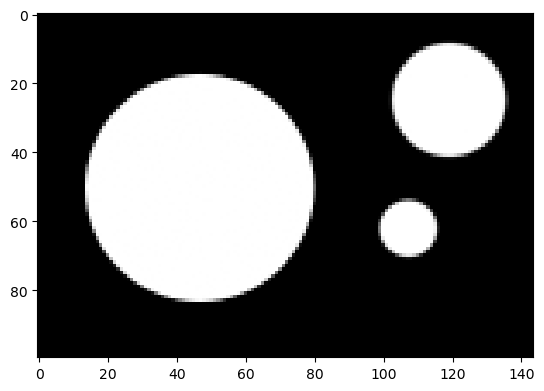

In [11]:
image = Image.open('Exercise01/SchwarzerKreis.png')
image = ImageOps.grayscale(image)
image = ImageOps.invert(image)
feat = Image.new('L', (int(image.width + 0.5 * image.width), image.height))
feat.paste(image, (0, 0))
feat.paste(ImageOps.scale(image, 0.5), (image.width, 0))
feat.paste(ImageOps.scale(image, 0.25), (image.width, int(0.5 * image.height)))

plt.imshow(feat, cmap='gray')
plt.show()

In [12]:
transform = transforms.ToTensor()
feat = transform(feat)

# Downsample using maxpool

In [28]:
downsample_1_maxpool = nn.MaxPool2d(2, stride=(2,2), dilation=1, return_indices=True)
downscaled_1, indices_1 = downsample_1_maxpool(feat)

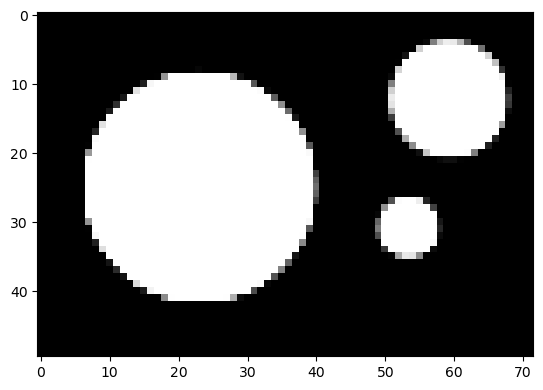

In [29]:
plt.imshow(downscaled_1[0], cmap='gray')

# Downsample using average pool

In [77]:
downsample_2_conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1, dilation=4, bias=False)
downsample_2_conv.state_dict()
weights = np.array([[-0.125, -0.125, -0.125], 
                    [-0.125,  1.000, -0.125], 
                    [-0.125, -0.125, -0.125]], dtype=np.float32)
weight_tensor = torch.from_numpy(weights).unsqueeze(0).unsqueeze(0)
weight_tensor

tensor([[[[-0.1250, -0.1250, -0.1250],
          [-0.1250,  1.0000, -0.1250],
          [-0.1250, -0.1250, -0.1250]]]])

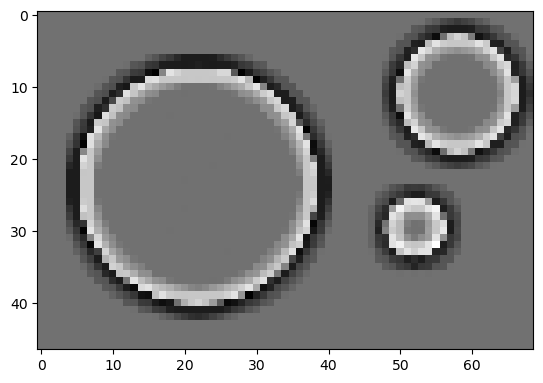

In [78]:
downsample_2_conv.load_state_dict({'weight': weight_tensor})
downscaled_2 = downsample_2_conv(feat.unsqueeze(0))
downscaled_2 = downscaled_2.squeeze(0)

plt.imshow(downscaled_2[0].detach().numpy(), cmap='gray')
plt.show()